In [33]:
library(caret)
library(dplyr)
library(rpart)
library(rpart.plot)
# library(rattle)
library(ROCR)
library(randomForest)
library(dummies)

In [5]:
credit<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\EDX_Scripts\\Principles-of-Machine-Learning-R-master\\Module4\\German_Credit_Preped.csv',stringsAsFactors = F)
  
  str(credit)

'data.frame':	1000 obs. of  22 variables:
 $ Customer_ID             : int  1122334 6156361 2051359 8740590 3924540 3115687 8251714 2272783 1865292 8369450 ...
 $ checking_account_status : chr  "< 0 DM" "0 - 200 DM" "none" "< 0 DM" ...
 $ loan_duration_mo        : int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history          : chr  "critical account - other non-bank loans" "current loans paid" "critical account - other non-bank loans" "current loans paid" ...
 $ purpose                 : chr  "radio/television" "radio/television" "education" "furniture/equipment" ...
 $ loan_amount             : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_account_balance : chr  "unknown/none" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ time_employed_yrs       : chr  ">= 7 years" "1 - 4 years" "4 - 7 years" "4 - 7 years" ...
 $ payment_pcnt_income     : int  4 2 2 2 3 2 3 2 2 4 ...
 $ gender_status           : chr  "male-single" "female-divorced/separated/married" "male-single" 

'data.frame':	1000 obs. of  21 variables:
 $ checking_account_status : chr  "< 0 DM" "0 - 200 DM" "none" "< 0 DM" ...
 $ loan_duration_mo        : int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history          : chr  "critical account - other non-bank loans" "current loans paid" "critical account - other non-bank loans" "current loans paid" ...
 $ purpose                 : chr  "radio/television" "radio/television" "education" "furniture/equipment" ...
 $ loan_amount             : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_account_balance : chr  "unknown/none" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ time_employed_yrs       : chr  ">= 7 years" "1 - 4 years" "4 - 7 years" "4 - 7 years" ...
 $ payment_pcnt_income     : int  4 2 2 2 3 2 3 2 2 4 ...
 $ gender_status           : chr  "male-single" "female-divorced/separated/married" "male-single" "male-single" ...
 $ other_signators         : chr  "none" "none" "none" "guarantor" ...
 $ time_in_residence       : 


  0   1 
700 300 

'data.frame':	1000 obs. of  21 variables:
 $ checking_account_status : chr  "< 0 DM" "0 - 200 DM" "none" "< 0 DM" ...
 $ loan_duration_mo        : int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history          : chr  "critical account - other non-bank loans" "current loans paid" "critical account - other non-bank loans" "current loans paid" ...
 $ purpose                 : chr  "radio/television" "radio/television" "education" "furniture/equipment" ...
 $ loan_amount             : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_account_balance : chr  "unknown/none" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ time_employed_yrs       : chr  ">= 7 years" "1 - 4 years" "4 - 7 years" "4 - 7 years" ...
 $ payment_pcnt_income     : int  4 2 2 2 3 2 3 2 2 4 ...
 $ gender_status           : chr  "male-single" "female-divorced/separated/married" "male-single" "male-single" ...
 $ other_signators         : chr  "none" "none" "none" "guarantor" ...
 $ time_in_residence       : 

In [13]:
set.seed(42)
ind<-createDataPartition(credit$bad_credit,p = 0.7,list = F)

credit_train<-credit[ind,]
credit_test<-credit[-ind,]
str(credit_train)

'data.frame':	700 obs. of  21 variables:
 $ checking_account_status : chr  "< 0 DM" "0 - 200 DM" "none" "< 0 DM" ...
 $ loan_duration_mo        : int  6 48 12 42 24 12 12 48 12 24 ...
 $ credit_history          : chr  "critical account - other non-bank loans" "current loans paid" "critical account - other non-bank loans" "current loans paid" ...
 $ purpose                 : chr  "radio/television" "radio/television" "education" "furniture/equipment" ...
 $ loan_amount             : int  1169 5951 2096 7882 2835 3059 1295 4308 1567 1199 ...
 $ savings_account_balance : chr  "unknown/none" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ time_employed_yrs       : chr  ">= 7 years" "1 - 4 years" "4 - 7 years" "4 - 7 years" ...
 $ payment_pcnt_income     : int  4 2 2 2 3 2 3 3 1 4 ...
 $ gender_status           : chr  "male-single" "female-divorced/separated/married" "male-single" "male-single" ...
 $ other_signators         : chr  "none" "none" "none" "guarantor" ...
 $ time_in_residence       : i

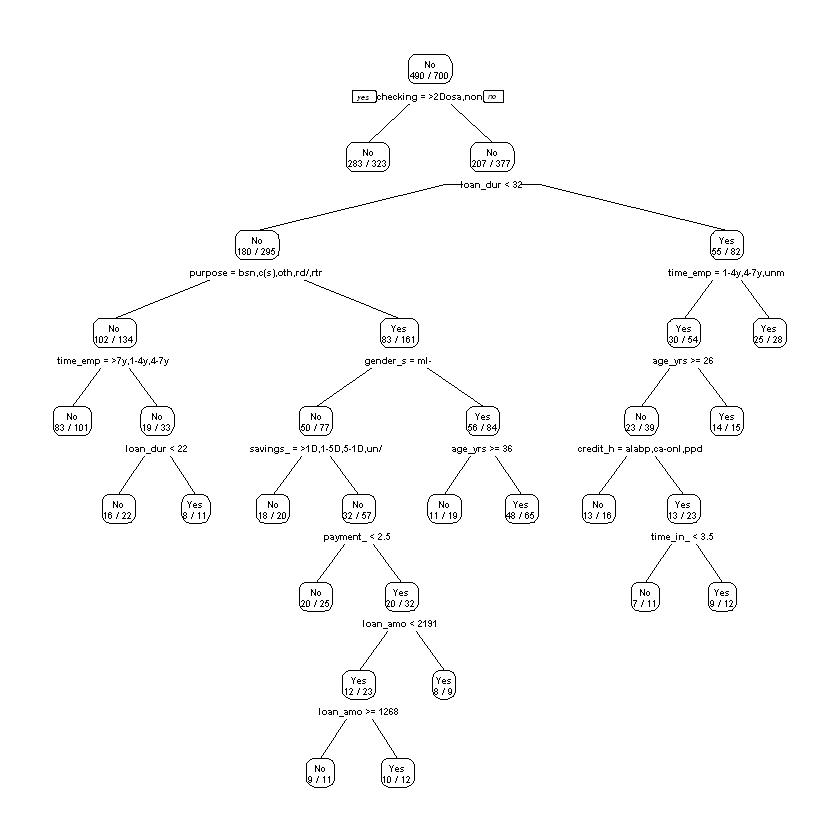

In [14]:
### Constructing decision tree

mod1<-rpart(bad_credit~.,data=credit_train)

prp(mod1,type = 2,extra=2)


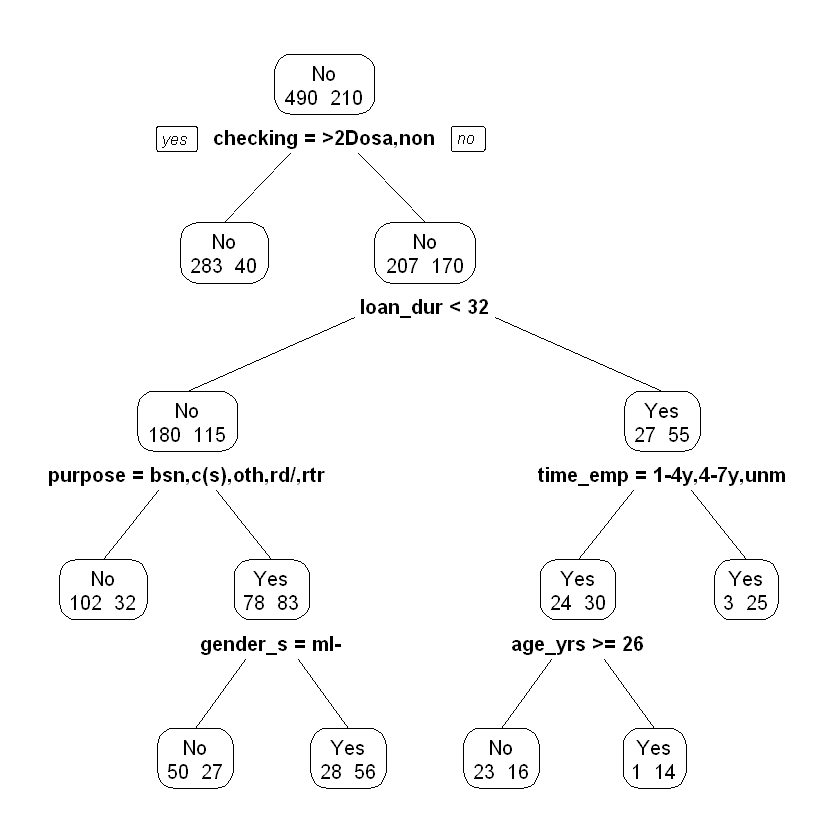

In [15]:
mod2<-rpart(bad_credit~.,data=credit_train,control = rpart.control(maxdepth = 4))

prp(mod2,type = 2,extra=1)


In [ ]:
fancyRpartPlot(mod2,type = 4)

In [36]:
pred_class<-predict(mod2,credit_test,type = 'class')

accuracy(credit_test$bad_credit,pred_class)

ERROR: Error in eval(expr, envir, enclos): could not find function "accuracy"


In [38]:
# asRules(mod2)

In [39]:
confusionMatrix(factor(pred_class),factor(credit_test$bad_credit),positive='Yes')

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  176  68
       Yes  34  22
                                          
               Accuracy : 0.66            
                 95% CI : (0.6033, 0.7135)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.941040        
                                          
                  Kappa : 0.0925          
 Mcnemar's Test P-Value : 0.001085        
                                          
            Sensitivity : 0.24444         
            Specificity : 0.83810         
         Pos Pred Value : 0.39286         
         Neg Pred Value : 0.72131         
             Prevalence : 0.30000         
         Detection Rate : 0.07333         
   Detection Prevalence : 0.18667         
      Balanced Accuracy : 0.54127         
                                          
       'Positive' Class : Yes             
                                          

In [40]:
confusionMatrix(table(predict(mod2,credit_test, type="prob")[,"Yes"] >= 0.20,
                      credit_test$bad_credit == "Yes"))

Confusion Matrix and Statistics

       
        FALSE TRUE
  FALSE   114   20
  TRUE     96   70
                                          
               Accuracy : 0.6133          
                 95% CI : (0.5557, 0.6687)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.9995          
                                          
                  Kappa : 0.2583          
 Mcnemar's Test P-Value : 3.317e-12       
                                          
            Sensitivity : 0.5429          
            Specificity : 0.7778          
         Pos Pred Value : 0.8507          
         Neg Pred Value : 0.4217          
             Prevalence : 0.7000          
         Detection Rate : 0.3800          
   Detection Prevalence : 0.4467          
      Balanced Accuracy : 0.6603          
                                          
       'Positive' Class : FALSE           
                                          

In [41]:
### Let's also construct ROC curve and calsulate AUC

pred_prob<-predict(mod2,credit_test,type='prob')

In [42]:
p_credit<-prediction(pred_prob[,2],credit_test$bad_credit)

In [43]:
perf<-performance(p_credit,'tpr','fpr')

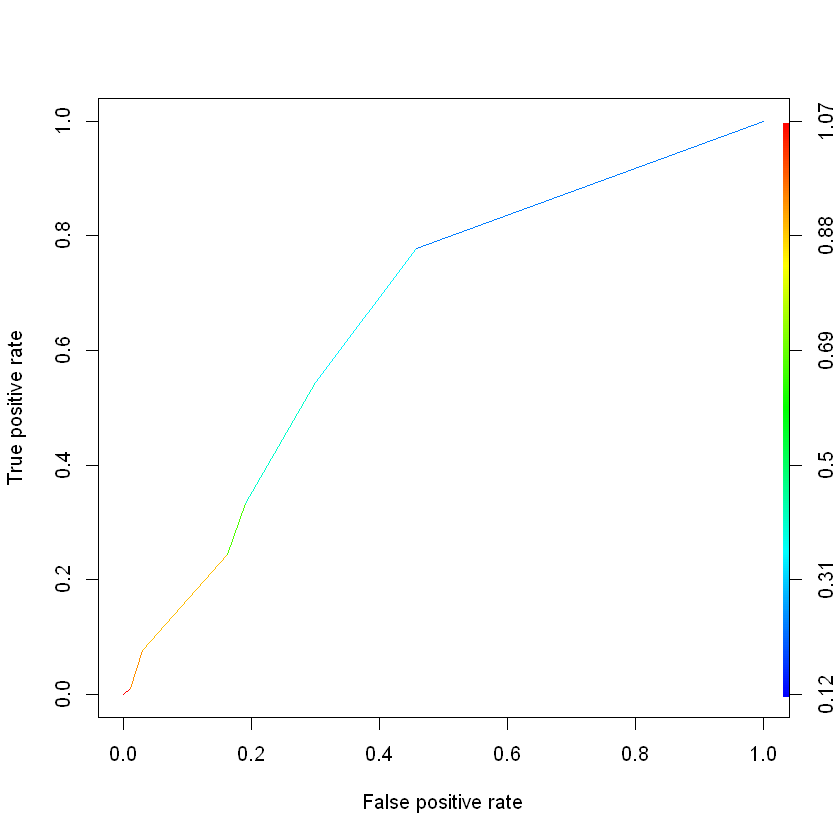

In [44]:
plot(perf,colorize=T)  ### Real bad result as line is almost goes through the center

In [45]:
### Now let's build random forest on other dataset
credit<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\EDX_Scripts\\Principles-of-Machine-Learning-R-master\\Module4\\German_Credit_Preped.csv',stringsAsFactors = F)
credit$Customer_ID<-NULL
credit$bad_credit<-ifelse(credit$bad_credit==1,'Yes','No')
set.seed(42)
ind<-createDataPartition(credit$bad_credit,p = 0.7,list = F)

credit_train<-credit[ind,]
credit_test<-credit[-ind,]
str(credit_train)

'data.frame':	700 obs. of  21 variables:
 $ checking_account_status : chr  "< 0 DM" "0 - 200 DM" "none" "< 0 DM" ...
 $ loan_duration_mo        : int  6 48 12 42 24 12 12 48 12 24 ...
 $ credit_history          : chr  "critical account - other non-bank loans" "current loans paid" "critical account - other non-bank loans" "current loans paid" ...
 $ purpose                 : chr  "radio/television" "radio/television" "education" "furniture/equipment" ...
 $ loan_amount             : int  1169 5951 2096 7882 2835 3059 1295 4308 1567 1199 ...
 $ savings_account_balance : chr  "unknown/none" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ time_employed_yrs       : chr  ">= 7 years" "1 - 4 years" "4 - 7 years" "4 - 7 years" ...
 $ payment_pcnt_income     : int  4 2 2 2 3 2 3 3 1 4 ...
 $ gender_status           : chr  "male-single" "female-divorced/separated/married" "male-single" "male-single" ...
 $ other_signators         : chr  "none" "none" "none" "guarantor" ...
 $ time_in_residence       : i

In [46]:
ch_into_factors<-function(df){
  ch <- sapply(df, is.character)
  df[ch]<-data.frame(apply(df[ch],2,as.factor))
  return(df)
}

In [47]:
credit_train<-ch_into_factors(credit_train)
str(credit_train)
credit_test<-ch_into_factors(credit_test)
str(credit_test)

'data.frame':	700 obs. of  21 variables:
 $ checking_account_status : Factor w/ 4 levels "< 0 DM","> 200 DM or salary assignment",..: 1 3 4 1 4 4 3 1 3 1 ...
 $ loan_duration_mo        : int  6 48 12 42 24 12 12 48 12 24 ...
 $ credit_history          : Factor w/ 5 levels "all loans at bank paid",..: 2 3 2 3 3 3 3 3 3 2 ...
 $ purpose                 : Factor w/ 10 levels "business","car (new)",..: 8 8 5 6 6 8 2 1 8 2 ...
 $ loan_amount             : int  1169 5951 2096 7882 2835 3059 1295 4308 1567 1199 ...
 $ savings_account_balance : Factor w/ 5 levels "< 100 DM",">= 1000 DM",..: 5 1 1 1 4 2 1 1 1 1 ...
 $ time_employed_yrs       : Factor w/ 5 levels "< 1 year",">= 7 years",..: 2 3 4 4 2 4 1 1 3 2 ...
 $ payment_pcnt_income     : int  4 2 2 2 3 2 3 3 1 4 ...
 $ gender_status           : Factor w/ 4 levels "female-divorced/separated/married",..: 4 1 4 4 4 2 1 1 1 4 ...
 $ other_signators         : Factor w/ 3 levels "co-applicant",..: 3 3 3 2 3 3 3 3 3 3 ...
 $ time_in_residence     

In [48]:
mod3<-randomForest(bad_credit~., data=credit_train,ntree=25,do.trace=T)

ntree      OOB      1      2
    1:  35.68% 26.19% 57.53%
    2:  34.21% 22.18% 62.40%
    3:  33.46% 23.22% 56.44%
    4:  34.28% 24.64% 55.98%
    5:  33.28% 20.63% 62.18%
    6:  32.77% 22.27% 57.07%
    7:  31.20% 19.96% 57.43%
    8:  29.78% 20.46% 51.46%
    9:  29.86% 19.83% 53.40%
   10:  30.79% 20.41% 54.76%
   11:  30.76% 20.04% 55.71%
   12:  29.47% 17.79% 56.67%
   13:  29.18% 17.59% 56.19%
   14:  30.57% 18.98% 57.62%
   15:  29.71% 16.94% 59.52%
   16:  30.00% 17.35% 59.52%
   17:  29.43% 16.73% 59.05%
   18:  28.14% 14.90% 59.05%
   19:  29.14% 15.31% 61.43%
   20:  26.86% 13.88% 57.14%
   21:  27.86% 14.49% 59.05%
   22:  27.57% 14.49% 58.10%
   23:  27.43% 14.49% 57.62%
   24:  26.14% 12.86% 57.14%
   25:  25.86% 13.06% 55.71%


In [49]:
pr<-predict(mod3,credit_test,type='prob')
pr[1:25,]

,No,Yes
5,0.68,0.32
6,0.72,0.28
8,0.64,0.36
10,0.28,0.72
16,0.68,0.32
19,0.36,0.64
20,0.92,0.08
31,0.84,0.16
33,0.60,0.40
46,0.88,0.12


[[1]]
[1] 0.7169048

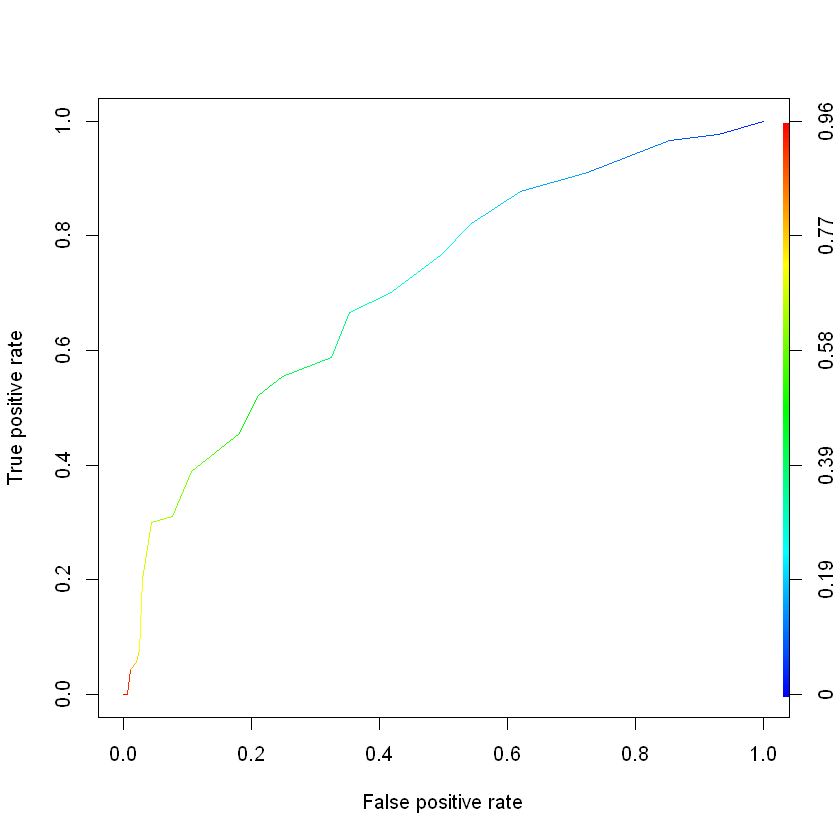

In [50]:
p_test<-prediction(pr[,2],credit_test$bad_credit)
perf<-performance(p_test,'tpr','fpr')
plot(perf,colorize=T)  ### Obviously this is better than perfious model
performance(p_test,'auc')@y.values  

In [51]:
### Doing with caret
library(caret)
set.seed(42)
trc<-trainControl(method='cv',number=10)
mtry_grid<-expand.grid(mtry=c(4,7,9,10))

In [52]:
set.seed(42)
mod4<-train(bad_credit~.,data=credit_train,trControl=trc,
            method='rf',ntree=25,
            tuneGrid=mtry_grid)

In [53]:
mod4$results

mtry,Accuracy,Kappa,AccuracySD,KappaSD
4,0.7485714,0.3056491,0.03700830,0.1229854
7,0.7514286,0.3401504,0.04771419,0.1212344
9,0.7557143,0.3415498,0.04783285,0.1286765
10,0.7700000,0.3877509,0.05692418,0.1593048


In [54]:
mod4$bestTune

,mtry
4,10


In [55]:
pr4<-predict(mod4,credit_test,type='prob')
pr4[1:25,]

,No,Yes
5,0.48,0.52
6,0.68,0.32
8,0.52,0.48
10,0.24,0.76
16,0.36,0.64
19,0.24,0.76
20,0.80,0.20
31,0.44,0.56
33,0.68,0.32
46,0.96,0.04


[[1]]
[1] 0.7167725

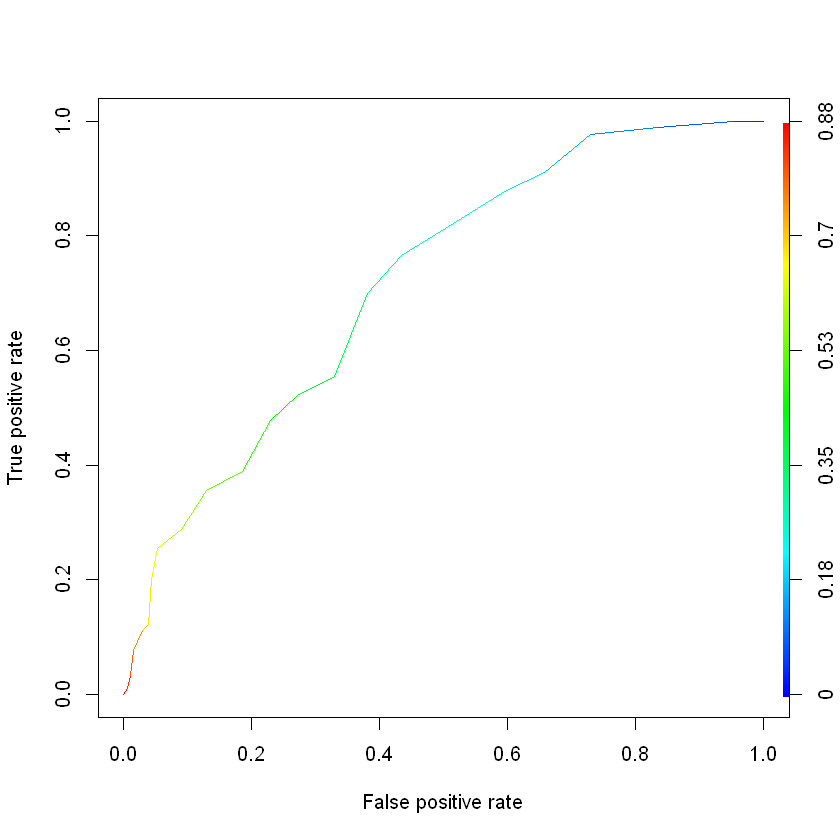

In [56]:
p_test4<-prediction(pr4[,2],credit_test$bad_credit)
perf<-performance(p_test4,'tpr','fpr')
plot(perf,colorize=T)  ### Obviously this is better than perfious model
performance(p_test4,'auc')@y.values  

In [57]:
set.seed(42)

trc<-trainControl(method = 'cv',
                  classProbs = TRUE,
                  summaryFunction = twoClassSummary,
                  number=5)

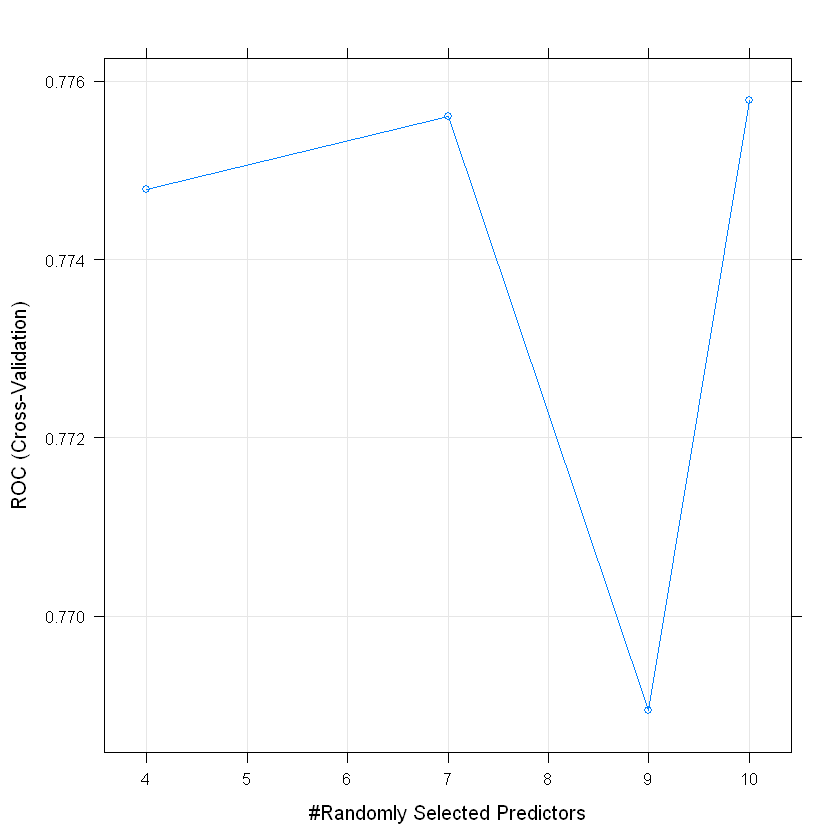

In [58]:
set.seed(42)
mm<-train(bad_credit~.,data=credit_train,
          trControl=trc,
          method='rf',ntree=25,
          metric='ROC',tuneGrid=mtry_grid)

plot(mm)

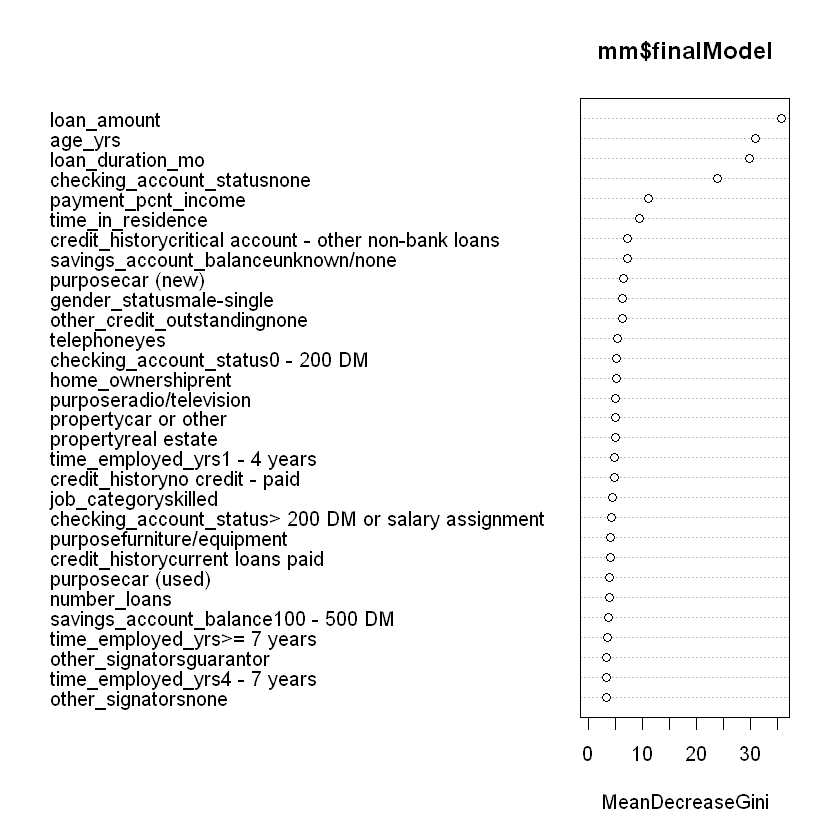

In [59]:
varImpPlot(mm$finalModel)